# Titanic Dataset Grouping and Aggregation

In this notebook you will explore the well known [Titanic dataset](https://www.kaggle.com/c/titanic/data), which contains data about the passengers of the Titanic ship that sunk after hitting an iceberg.

## Import

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Load the Titanic data set

Seaborn ships with this dataset, which can be loaded as follows:

In [2]:
titanic = sns.load_dataset('titanic').dropna()

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Basic grouping

Compute the mean of the `age` column grouped by `sex`:

In [4]:
titanic.groupby(['sex'])['age'].mean()

sex
female    32.676136
male      38.382128
Name: age, dtype: float64

Create an appropriately labeled Seaborn `violinplot` with `sex` on the x-axis and `age` on the y-axis. This plot displays the same information as the preceeding group-by operation.

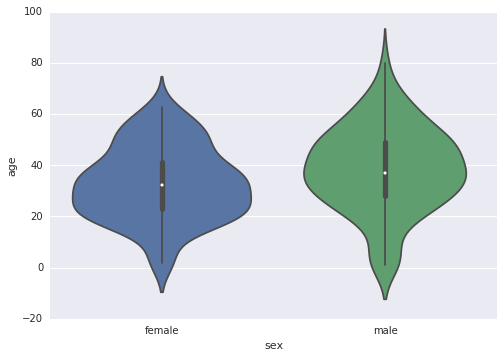

In [5]:
sns.violinplot(x=titanic['sex'], y=titanic['age'])

Compute the mean and standard deviation of the `age` column, grouped by the `sex` and `alive` columns. How did age and sex play a role in who survived?

In [15]:
mean = titanic.groupby(['sex','alive'])['age'].mean()
std = titanic.groupby(['sex','alive'])['age'].std()
print ("MEAN\n", mean)
print ()
print ("STD\n", std)

MEAN
 sex     alive
female  no       27.500000
        yes      33.054878
male    no       42.849057
        yes      32.607805
Name: age, dtype: float64

STD
 sex     alive
female  no       23.175418
        yes      13.510400
male    no       14.309285
        yes      17.506299
Name: age, dtype: float64


Females within 13.5 years of 33.1 made up 68 percent of female survivors

Males within 17.5 years of 32.6 made up 68 percent of Male survivors

Create an appropriately labeled Seaborn `boxplot` with `sex` on the x-axis, `age` on the  y-axis and `alive` for the huge. Again, this visualization contains similar information to the preceeding group-by operation.

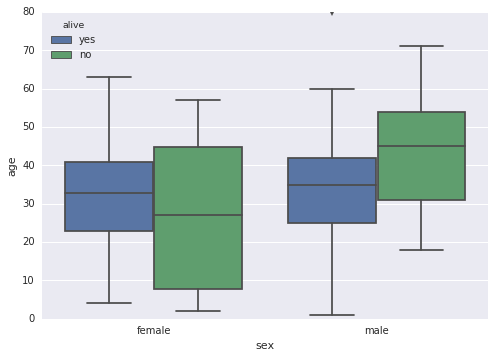

In [17]:
sns.boxplot(titanic.sex, titanic.age, hue=titanic.alive)

## Looking at a categorical variable

Use `value_counts` to count the number of people who where alone, grouped by `sex` and `alive`.

In [32]:
titanic.groupby(['sex','alive'])['alone'].value_counts()

sex     alive  alone
female  no     False     4
               True      2
        yes    False    52
               True     30
male    no     True     28
               False    25
        yes    False    23
               True     18
dtype: int64

Create an appropriately labeled `countplot` with `alone` on the x-axis and `alive` as the hue:

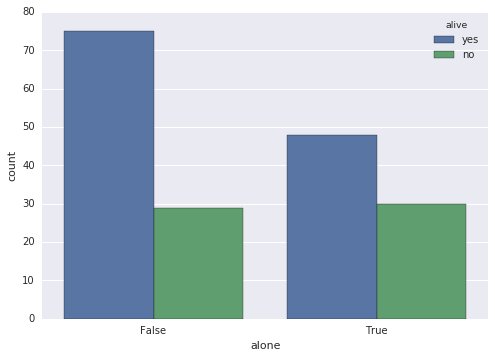

In [22]:
sns.countplot(titanic.alone, hue=titanic.alive)

To get a better idea of how being alone made a difference, use the `apply` method to compute for each group in the above query how many more people lived who were not alone than were alone.

In [40]:
# Sex. Alive? Alone?
#   Living not Alone
fNotAlone = titanic.groupby(['sex','alive'])['alone'].value_counts().female.yes[0]
mNotAlone =titanic.groupby(['sex','alive'])['alone'].value_counts().male.yes[0]
#   Living Alone
fAlone = titanic.groupby(['sex','alive'])['alone'].value_counts().female.yes[1]
mAlone = titanic.groupby(['sex','alive'])['alone'].value_counts().male.yes[1]

In [42]:
notAlone = fNotAlone + mNotAlone
alone = fAlone + mAlone

In [43]:
notAlone - alone

27